Задача "Преобразование Фурье"
Для функции f на диапазоне [0, 10] с частотой дискретизации 100 изготовьте код для построения графика f.
Используйте matplotlib.
Реализуйте прямое и обратное дискретное преобразование Фурье FFT и FFTReverse на питоне за O(n log n).
Подготовьте дискретизацию f на отрезке [0, T] - набор значений fi=f(xi) в точках xi,
равномерно расположенных на отрезке [0, T].
По функции f=(f0,..,fm-1) вычислите g = FFT( f ).
Вычислите f2 = FFTReverse( g ).
Постройте график f2.
Обнулите некоторую долю D последних коэффициентов g. Обновите f2 и ее график. Попробуйте несколько различных значений D.
Проведите эксперименты с функциями f = x, x2, sin x, sin x2, sin x / x. Для каждой функции найдите долю D, для которой разница f и f2 видна невооруженным глазом.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [22]:
segment_begin = np.float64(0.01)
segment_end = np.float64(10)
sampling_frequency = 100

In [23]:
def fft(array, inverse=False):
    array = array + np.zeros(array.shape[0], dtype=np.complex128)
    array = recursive_fft(array, inverse).copy()
    return array.copy()

In [24]:
def recursive_fft(array, inverse=False):
    if array.shape[0] == 1:
        return np.array([array[0]], dtype=np.complex128)
    left_part = array[::2].copy()
    right_part = array[1::2].copy()
    left_part = recursive_fft(left_part, inverse)
    right_part = recursive_fft(right_part, inverse)
    angle = (2 * np.pi * (-1 if inverse else 1)) / np.float64(array.shape[0])
    current_n_root = np.complex128(1 + 0j)
    first_n_root = np.complex128(math.cos(angle) + math.sin(angle) * 1j)
    new_array = array.copy()
    for i in range(new_array.shape[0] // 2):
        new_array[i] = left_part[i] + current_n_root * right_part[i]
        new_array[i + new_array.shape[0] // 2] = left_part[i] - current_n_root * right_part[i]
        if inverse:
            new_array[i] /= 2
            new_array[i + new_array.shape[0] // 2] /= 2
        current_n_root *= first_n_root
    return new_array

In [60]:
def test(func, D=0, label=None):
    points = np.linspace(segment_begin, segment_end, num=sampling_frequency)
    function_values = np.array([func(points[i]) for i in range(sampling_frequency)], dtype=np.float64)
    if not label == 'raw':
        if not math.log2(sampling_frequency).is_integer():
            new_size = 2 ** int(math.ceil(math.log2(sampling_frequency)))
            function_values =\
                np.concatenate((function_values, np.zeros(new_size - sampling_frequency, dtype=np.complex128)))
        ffted = fft(function_values)
        for i in range(int(ffted.shape[0] * (1 - D)), ffted.shape[0]):
            ffted[i] = np.complex128(0)
        inverse_ffted = fft(ffted, True)
    else:
        inverse_ffted = function_values
    plt.plot(points, inverse_ffted.real[:sampling_frequency],
             label=str(D) if label == None else label)
    plt.grid(True)
    

In [61]:
def serie_of_tests_for_funcs(func, array):
    for elem in array:
        test(func, *elem)
    plt.legend(bbox_to_anchor=(1.04, 1), loc='right')
    plt.show()

In [62]:
plt.rcParams['figure.figsize'] = (10, 7)

При любом D функция перестает быть похожа на исходную. При большом значении (0.9) и малых (0.015, 0.05) функция выглядит гладкой. При средних значениях (0.3, 0.6) функции выглядят ломаными. При этом при всех D > 0 графики функций локализованы примерно в одной области.

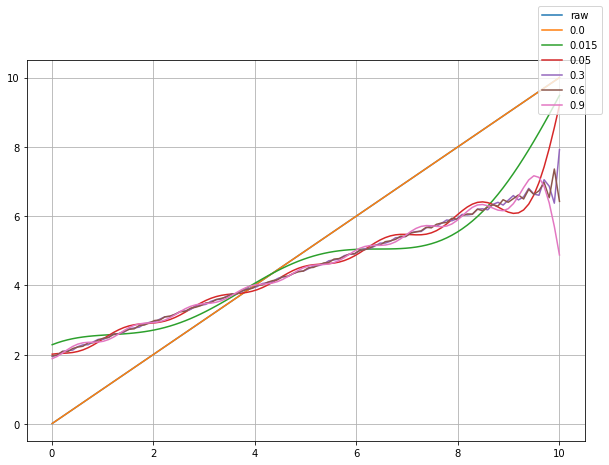

In [77]:
"""
f(x) = x
"""
func = lambda x: x
serie_of_tests_for_funcs(func,(
    (0., 'raw'),
    (0.,),
    (0.015,),
    (0.05,),
    (0.3,),
    (0.6,),
    (0.9,)
))

In [ ]:
Поведение функции идентично поведению функции f(x) = x, причем у этой функции после преобразования Фурье
сильно уменьшилась скорость возрастания.

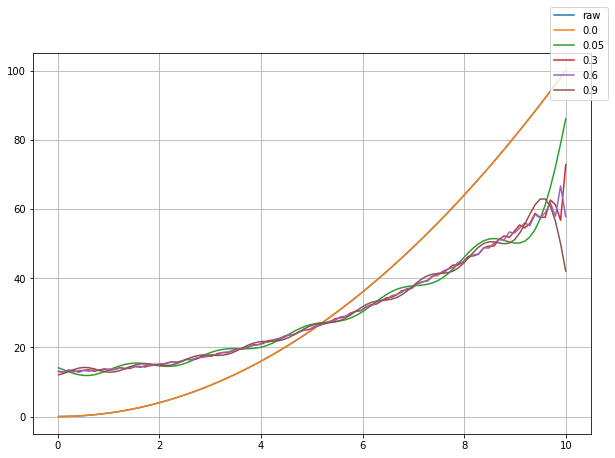

In [64]:
"""
    f(x) = x^2
"""
func = lambda x: x * x
serie_of_tests_for_funcs(func, (
    (0.0, 'raw'),
    (0.0,),
    (0.05,),
    (0.3,),
    (0.6,),
    (0.9,)
))

При любом параметре D, отличном от нуля, периодичность функции сохраняется и общее поведение тоже, но уменьшается амплитуда, причем это не зависит от параметра D

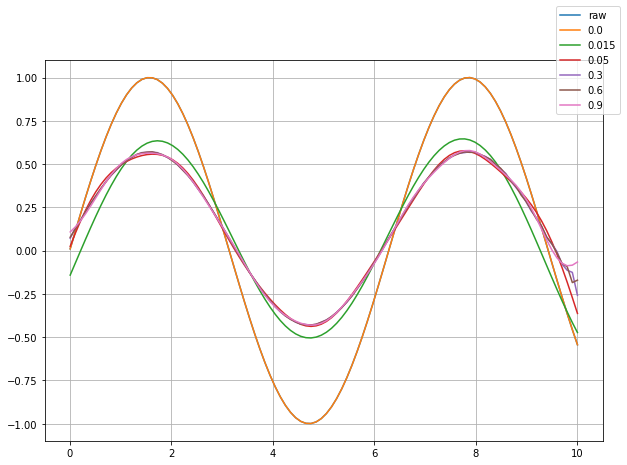

In [65]:
"""
f(x) = sin(x)
"""
func = lambda x: math.sin(x)
serie_of_tests_for_funcs(func, (
    (0.0, 'raw'),
    (0.0,),
    (0.015,),
    (0.05,),
    (0.3,),
    (0.6,),
    (0.9,)
))

При низких параметрах D функцию почти неотличима от f, особенно на отрезке [2, 10], с повышением параметра D ее амплитуда повышается, но сохраняется периодичность

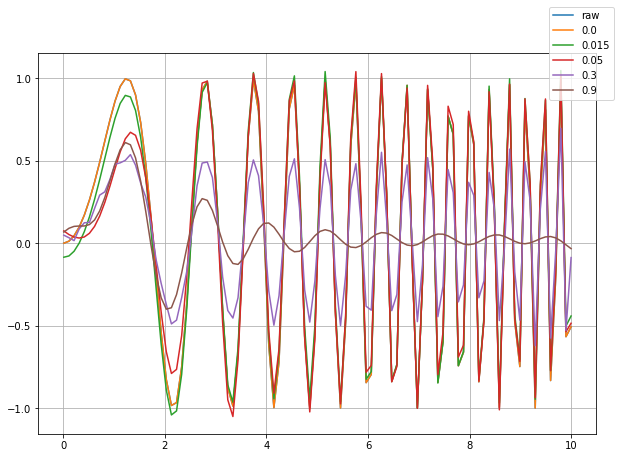

In [73]:
func = lambda x: math.sin(x * x)
serie_of_tests_for_funcs(func, (
    (0.0, 'raw'),
    (0.0,),
    (0.015,),
    (0.05,),
    (0.3,),
    (0.6,),
    (0.9,)
))

При D = 0.015, 0.05, 0.9 функция остается гладкой (то есть, при низких и высоких значениях),
у преобразованной функции немного сдвигаются экстремумы и она становится немного более пологой.

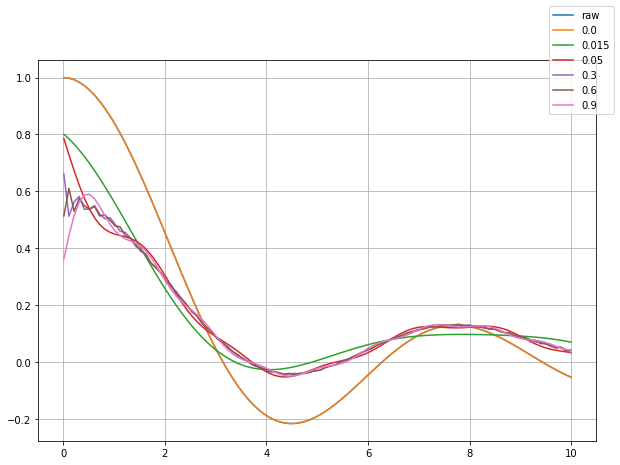

In [78]:
func = lambda x: math.sin(x) / x
serie_of_tests_for_funcs(func, (
    (0.0, 'raw'),
    (0.0,),
    (0.015,),
    (0.05,),
    (0.3,),
    (0.6,),
    (0.9,)
))

Общий вывод для всех функций:
1) Композиция  прямого и обратного преобразование Фурье абсолютно не изменяет функции
2) При небольшом D (0.01-0.05) функции значительно теряют амплитуду, но сохраняют гладкость, период и график остается похож на график исходной функции
3) При средних D (0.3-0.6) функция теряет гладкость
4) При высоких значениях D (>= 0.9) функция снова становится гладкой, при этом ее амплитуда сильно падает